In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
data_dir = '/n/groups/patel/aashna/xray-dl/chexploration/datafiles/chexpert/'
df_cxr = pd.read_csv(data_dir + 'chexpert.sample.csv')

In [3]:
df_train = pd.read_csv(data_dir + 'chexpert.sample.train.csv')
df_val = pd.read_csv(data_dir + 'chexpert.sample.val.csv')
df_test = pd.read_csv(data_dir + 'chexpert.sample.test.csv')

In [42]:
print('Train: ', df_train.shape[0])
print('Val: ', df_val.shape[0])
print('Test: ', df_test.shape[0])

print('\nRace Distributions')
print('Train:', )
print(df_train['race'].value_counts(normalize=True).round(2)) 

print('Val:', )
print(df_val['race'].value_counts(normalize=True).round(2)) 

print('Test:')
print(df_test['race'].value_counts(normalize=True).round(2)) 


Train:  76205
Val:  12673
Test:  38240

Race Distributions
Train:
White    0.78
Asian    0.15
Black    0.07
Name: race, dtype: float64
Val:
White    0.78
Asian    0.14
Black    0.07
Name: race, dtype: float64
Test:
White    0.78
Asian    0.15
Black    0.07
Name: race, dtype: float64


# Plots

#### Uncertainty Labels Per Disease

In [4]:
labels = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 
          'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 
          'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 
          'Pleural Other', 'Fracture', 'Support Devices']

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['DataFrame', 'Label', 'Value', 'Count'])
df_names = ['Train', 'Validation', 'Test']
# Loop through the DataFrames
for idx, df in enumerate([df_train, df_val, df_test]):
    df = df.fillna(0)
    for column in df[labels].columns:
        # Get value counts for the column
        counts = df[column].value_counts().reset_index()
        # Rename columns for clarity
        counts.columns = ['Value', 'Count']
        # Add DataFrame and Column information
        counts['DataFrame'] = df_names[idx]
        counts['Label'] = column
        # Append to the results DataFrame
        results_df = pd.concat([results_df, counts], ignore_index=True)

# Pivot the DataFrame
pivoted_df = results_df.pivot(index=['DataFrame', 'Value'], columns='Label', values='Count')

Label            Atelectasis Cardiomegaly Consolidation  Edema  \
DataFrame  Value                                                 
Test       -1.0         6358          701          4872   2182   
            0.0        25996        32040         31015  26013   
            1.0         5886         5499          2353  10045   
Train      -1.0        12262         1421          9497   4447   
            0.0        52298        64199         61739  52285   
            1.0        11645        10585          4969  19473   
Validation -1.0         2180          241          1673    720   
            0.0         8606        10721         10189   8759   
            1.0         1887         1711           811   3194   

Label            Enlarged Cardiomediastinum Fracture Lung Lesion Lung Opacity  \
DataFrame  Value                                                                
Test       -1.0                        2601       84         241           53   
            0.0                       34347    36676       36425        19275   
            1.0                        1292     1480        1574        18912   
Train      -1.0                        5396      160         521           84   
            0.0                       68268    73143       72770        38721   
            1.0                        2541     2902        2914        37400   
Validation -1.0                         904       26          71           23   
            0.0                       11340    12172       12103         6569   
            1.0                         429      475         499         6081   

Label            No Finding Pleural Effusion Pleural Other Pneumonia  \
DataFrame  Value                                                       
Test       -1.0         NaN             1339           389      3394   
            0.0       35125            20868         37260     34048   
            1.0        3115            16033           591       798   
Train      -1.0         NaN             2535           768      6896   
            0.0       70021            41510         74238     67761   
            1.0        6184            32160          1199      1548   
Validation -1.0         NaN              424           142      1081   
            0.0       11650             7037         12314     11313   
            1.0        1023             5212           217       279   

Label            Pneumothorax Support Devices  
DataFrame  Value                               
Test       -1.0           433               6  
            0.0         34473           17537  
            1.0          3334           20697  
Train      -1.0           936              19  
            0.0         68406           35611  
            1.0          6863           40575  
Validation -1.0           143               4  
            0.0         11410            5856  
            1.0          1120            6813

/tmp/ipykernel_17853/3012727981.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


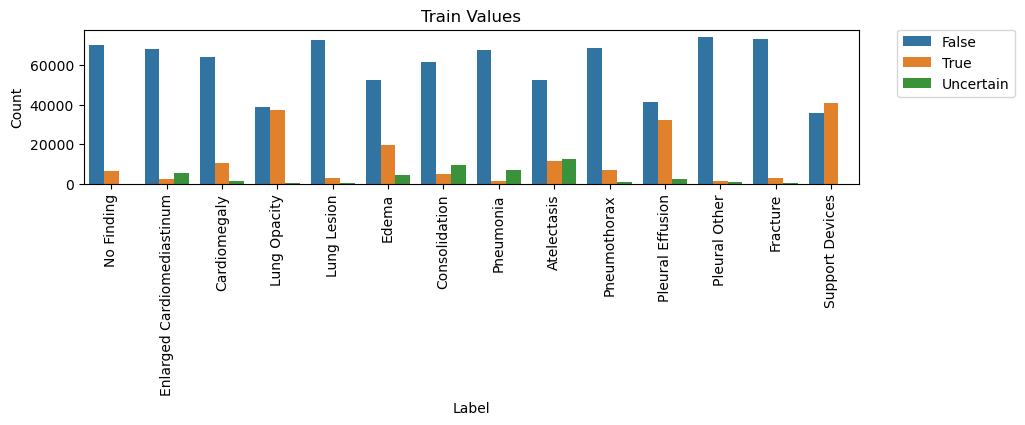

/tmp/ipykernel_17853/3012727981.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


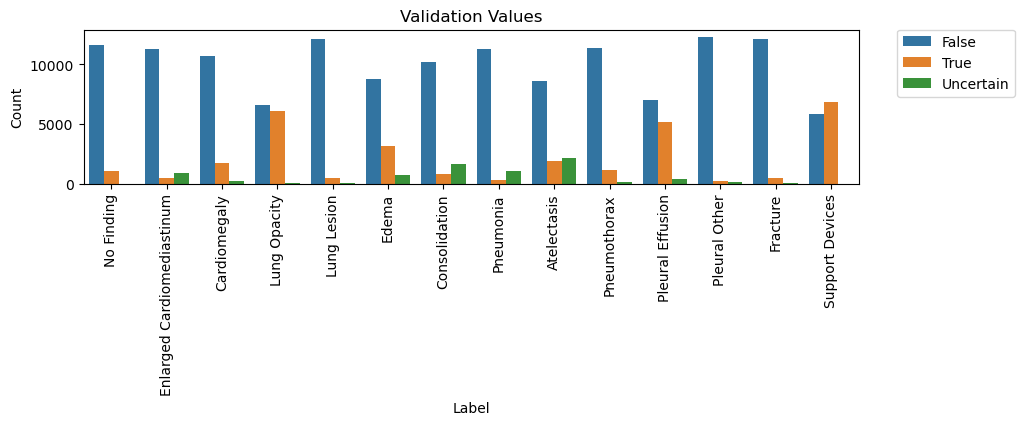

/tmp/ipykernel_17853/3012727981.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


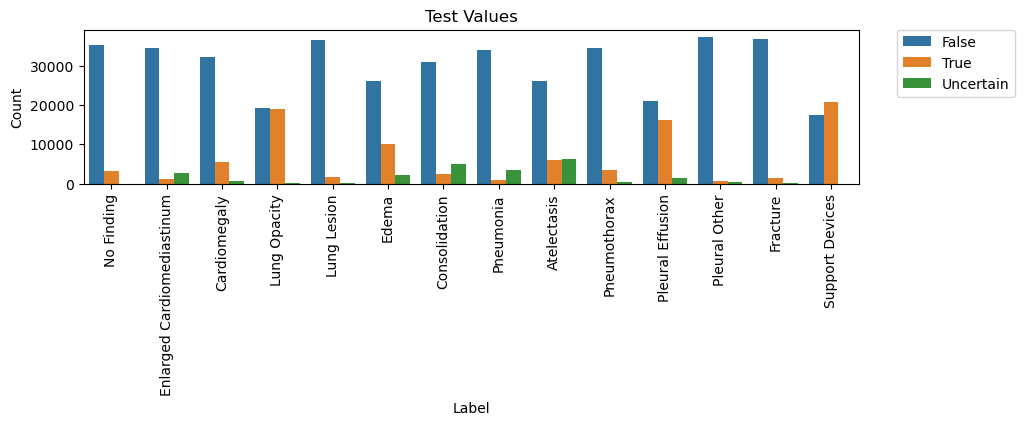

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing code to create the results_df

# Loop through the DataFrames
for idx, df in enumerate([df_train, df_val, df_test]):
    # Filter the results DataFrame for the current DataFrame
    filtered_df = results_df[results_df['DataFrame'] == df_names[idx]]
    # Get a list of unique columns in the current DataFrame
    unique_columns = filtered_df['Label'].unique()
    
    # Create a bar plot
    plt.figure(figsize=(10, 2))  # Set the figure size
    filtered_df = filtered_df.replace(1, 'True')
    filtered_df = filtered_df.replace(0, 'False')
    filtered_df = filtered_df.replace(-1, 'Uncertain')

    sns.barplot(x='Label', y='Count', hue = 'Value', data=filtered_df) #,  dodge=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(f'{df_names[idx]} Values')
    plt.ylabel('Count')
    plt.xlabel('Label')
    plt.xticks(rotation=90)  # Rotate x-axis labels if needed
    
    # Show the plot
    plt.tight_layout()
    plt.show()


#### Race Distribution Per Disease

In [6]:
labels = [
    'No Finding',
    'Enlarged Cardiomediastinum',
    'Cardiomegaly',
    'Lung Opacity',
    'Lung Lesion',
    'Edema',
    'Consolidation',
    'Pneumonia',
    'Atelectasis',
    'Pneumothorax',
    'Pleural Effusion',
    'Pleural Other',
    'Fracture',
    'Support Devices']


In [7]:
df_train = df_cxr[df_cxr.split=="train"]
df_val = df_cxr[df_cxr.split=="validate"]
df_test = df_cxr[df_cxr.split=="test"]

disease,race,No Finding,Other
0,Asian,1010 (8.88%),10361 (91.12%)
1,Black,544 (9.72%),5052 (90.28%)
2,White,4630 (7.82%),54608 (92.18%)


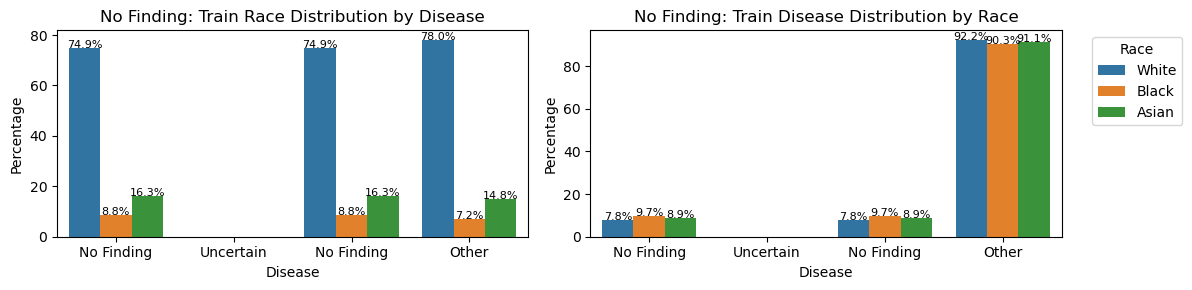

disease,race,Enlarged Cardiomediastinum,No Finding,Other,Uncertain
0,Asian,397 (3.49%),1009 (8.87%),9157 (80.53%),808 (7.11%)
1,Black,199 (3.56%),543 (9.70%),4463 (79.75%),391 (6.99%)
2,White,1945 (3.28%),4617 (7.79%),48479 (81.84%),4197 (7.08%)


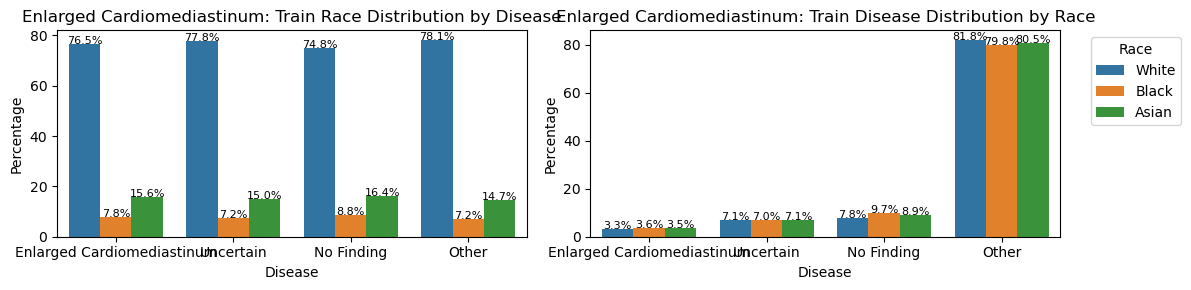

disease,race,Cardiomegaly,No Finding,Other,Uncertain
0,Asian,1588 (13.97%),1010 (8.88%),8553 (75.22%),220 (1.93%)
1,Black,1273 (22.75%),544 (9.72%),3663 (65.46%),116 (2.07%)
2,White,7724 (13.04%),4630 (7.82%),45799 (77.31%),1085 (1.83%)


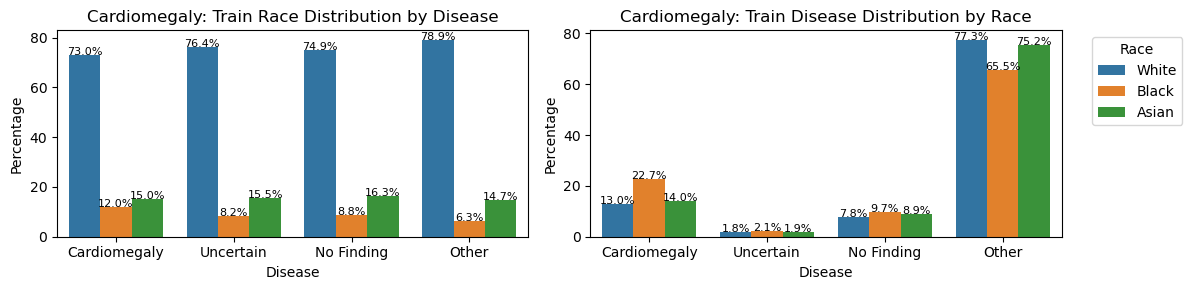

disease,race,Lung Opacity,No Finding,Other,Uncertain
0,Asian,5568 (48.97%),1010 (8.88%),4783 (42.06%),10 (0.09%)
1,Black,2626 (46.93%),544 (9.72%),2417 (43.19%),9 (0.16%)
2,White,29206 (49.30%),4625 (7.81%),25342 (42.78%),65 (0.11%)


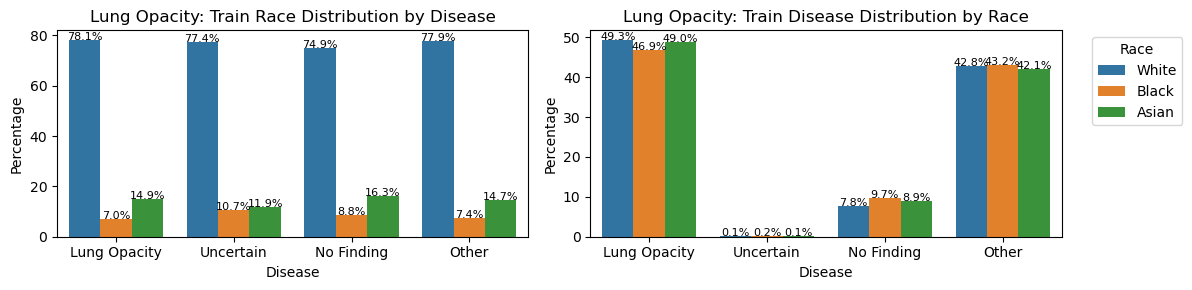

disease,race,Lung Lesion,No Finding,Other,Uncertain
0,Asian,673 (5.92%),1010 (8.88%),9609 (84.50%),79 (0.69%)
1,Black,144 (2.57%),544 (9.72%),4872 (87.06%),36 (0.64%)
2,White,2097 (3.54%),4630 (7.82%),52105 (87.96%),406 (0.69%)


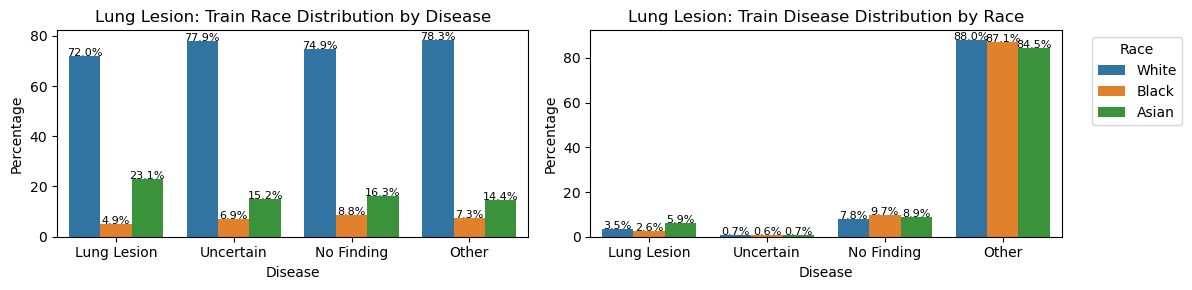

disease,race,Edema,No Finding,Other,Uncertain
0,Asian,2478 (21.79%),1010 (8.88%),7271 (63.94%),612 (5.38%)
1,Black,1617 (28.90%),544 (9.72%),3044 (54.40%),391 (6.99%)
2,White,15378 (25.96%),4629 (7.81%),35787 (60.41%),3444 (5.81%)


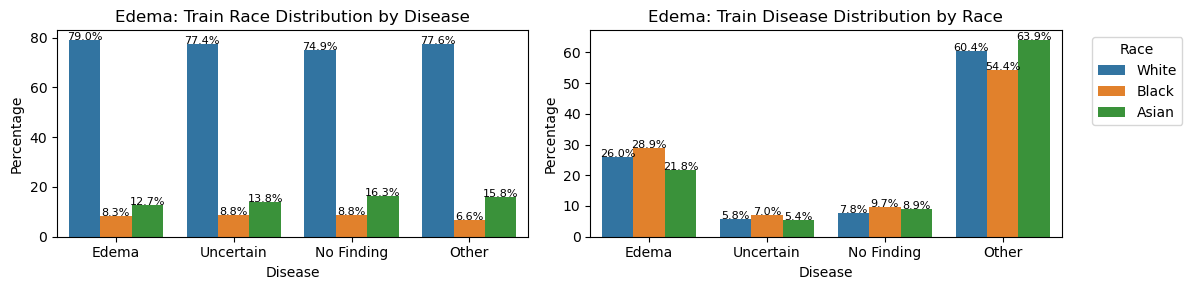

disease,race,Consolidation,No Finding,Other,Uncertain
0,Asian,844 (7.42%),1010 (8.88%),8232 (72.39%),1285 (11.30%)
1,Black,313 (5.59%),544 (9.72%),4005 (71.57%),734 (13.12%)
2,White,3812 (6.44%),4628 (7.81%),43320 (73.13%),7478 (12.62%)


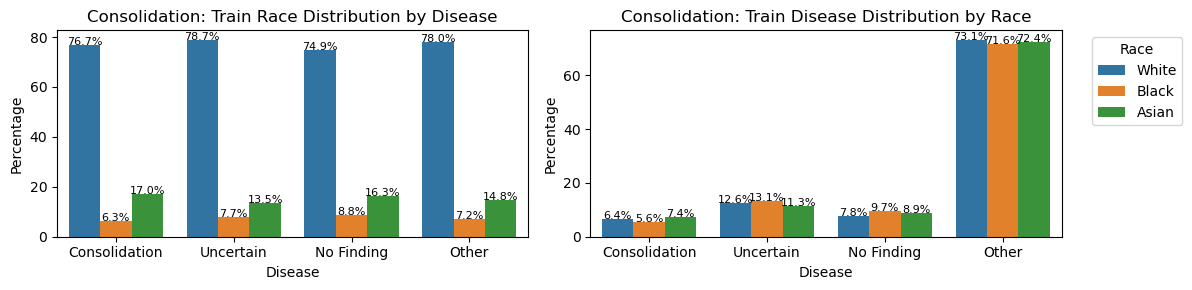

disease,race,No Finding,Other,Pneumonia,Uncertain
0,Asian,1010 (8.88%),9128 (80.27%),256 (2.25%),977 (8.59%)
1,Black,544 (9.72%),4363 (77.97%),103 (1.84%),586 (10.47%)
2,White,4630 (7.82%),48086 (81.17%),1189 (2.01%),5333 (9.00%)


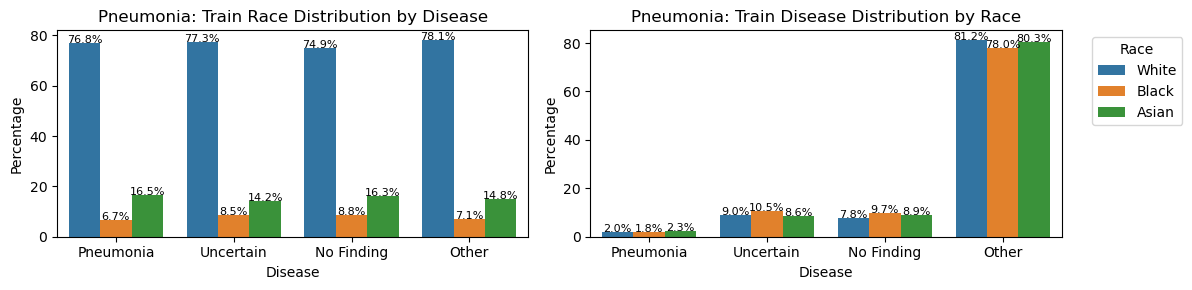

disease,race,Atelectasis,No Finding,Other,Uncertain
0,Asian,1557 (13.69%),1006 (8.85%),7128 (62.69%),1680 (14.77%)
1,Black,700 (12.51%),542 (9.69%),3381 (60.42%),973 (17.39%)
2,White,9388 (15.85%),4600 (7.77%),35641 (60.17%),9609 (16.22%)


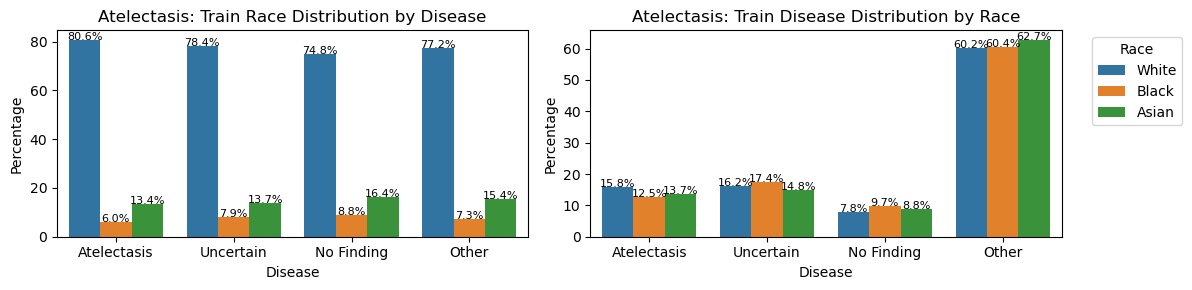

disease,race,No Finding,Other,Pneumothorax,Uncertain
0,Asian,1010 (8.88%),9059 (79.67%),1152 (10.13%),150 (1.32%)
1,Black,544 (9.72%),4704 (84.06%),300 (5.36%),48 (0.86%)
2,White,4630 (7.82%),48459 (81.80%),5411 (9.13%),738 (1.25%)


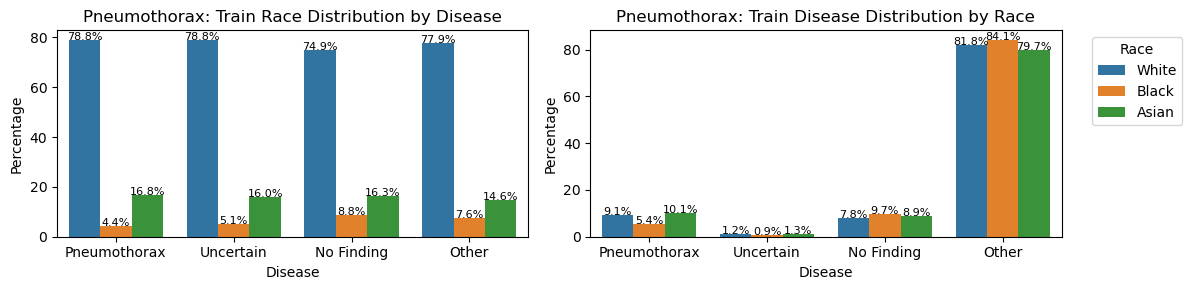

disease,race,No Finding,Other,Pleural Effusion,Uncertain
0,Asian,1010 (8.88%),5111 (44.95%),4931 (43.36%),319 (2.81%)
1,Black,544 (9.72%),2918 (52.14%),1933 (34.54%),201 (3.59%)
2,White,4626 (7.81%),27301 (46.09%),25296 (42.70%),2015 (3.40%)


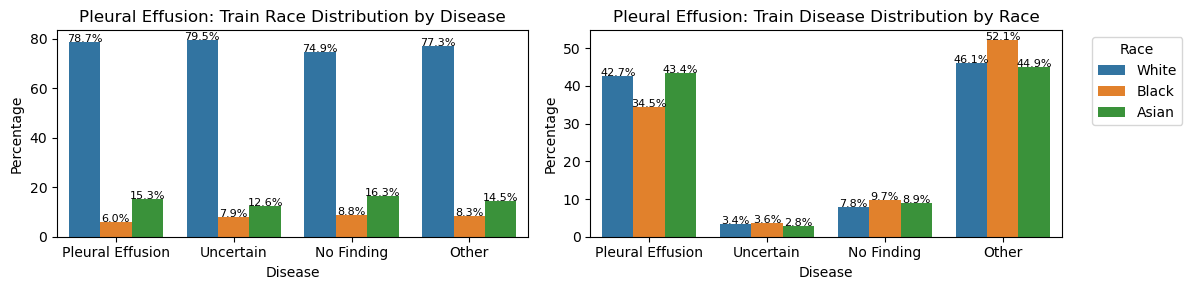

disease,race,No Finding,Other,Pleural Other,Uncertain
0,Asian,1010 (8.88%),10074 (88.59%),177 (1.56%),110 (0.97%)
1,Black,544 (9.72%),4931 (88.12%),68 (1.22%),53 (0.95%)
2,White,4630 (7.82%),53049 (89.55%),954 (1.61%),605 (1.02%)


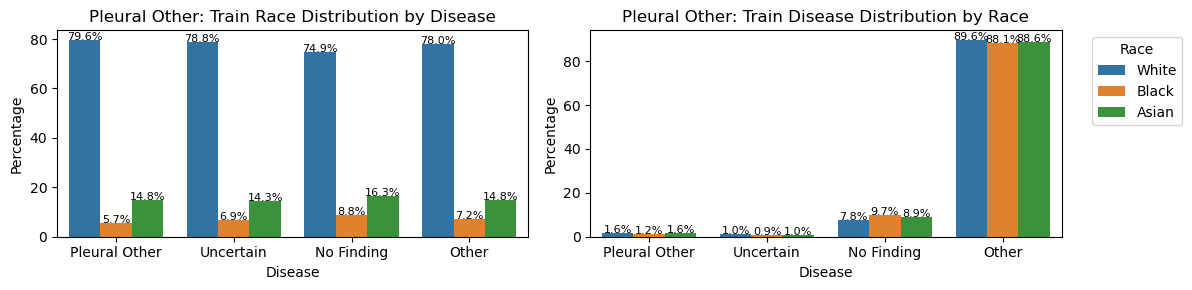

disease,race,Fracture,No Finding,Other,Uncertain
0,Asian,356 (3.13%),1010 (8.88%),9983 (87.79%),22 (0.19%)
1,Black,118 (2.11%),544 (9.72%),4926 (88.03%),8 (0.14%)
2,White,2428 (4.10%),4630 (7.82%),52050 (87.87%),130 (0.22%)


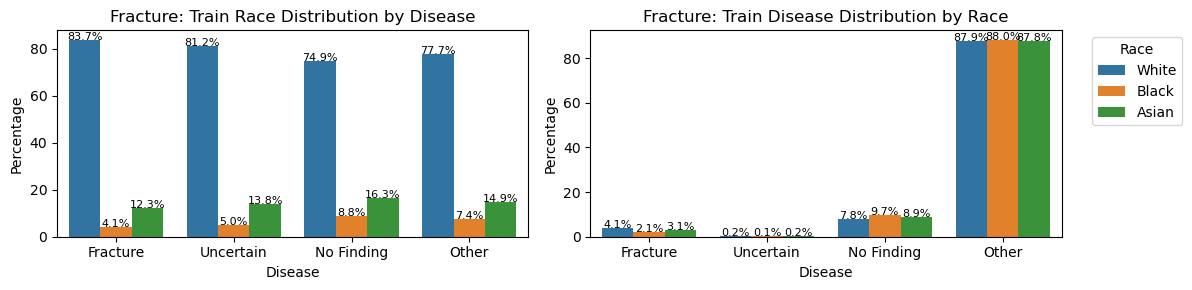

disease,race,No Finding,Other,Support Devices,Uncertain
0,Asian,607 (5.34%),4731 (41.61%),6030 (53.03%),3 (0.03%)
1,Black,365 (6.52%),2553 (45.62%),2677 (47.84%),1 (0.02%)
2,White,2686 (4.53%),24669 (41.64%),31868 (53.80%),15 (0.03%)


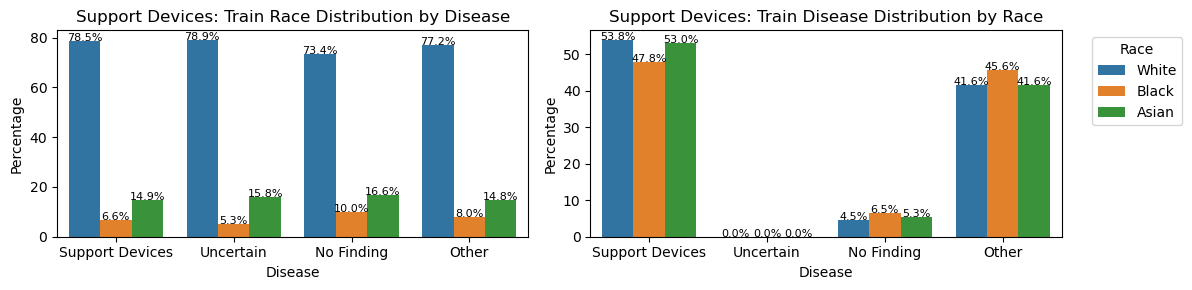

In [77]:
import pandas as pd
for label in labels: 
    disease_label = label # Pleural Effusion

    df_cxr['disease'] = df_cxr[labels[0]]
    df_cxr.loc[df_cxr[labels[0]] == 1, 'disease'] = labels[0]
    df_cxr.loc[df_cxr[disease_label] == -1, 'disease'] = 'Uncertain'
    df_cxr.loc[df_cxr[disease_label] == 1, 'disease'] = disease_label
    df_cxr.loc[df_cxr['disease'].isna(), 'disease'] = 'Other'

    df_cxr['disease_label'] = df_cxr['disease']
    df_cxr.loc[df_cxr['disease_label'] == labels[0], 'disease_label'] = 0
    df_cxr.loc[df_cxr['disease_label'] == labels[10], 'disease_label'] = 1
    df_cxr.loc[df_cxr['disease_label'] == 'Other', 'disease_label'] = 2

    df_train = df_cxr[df_cxr.split=="train"]
    df_val = df_cxr[df_cxr.split=="validate"]
    df_test = df_cxr[df_cxr.split=="test"]

    # Create an empty DataFrame to store the counts and percentages
    result_df = pd.DataFrame()

    # Calculate the counts of disease by race
    counts = df_train.groupby(['race', 'disease']).size().unstack(fill_value=0)

    # Calculate the percentages
    percentages = counts.div(counts.sum(axis=1), axis=0)

    # Format the percentages with parentheses and merge with counts
    formatted_percentages = percentages.applymap(lambda x: f'{x:.2%}')
    combined_df = counts.astype(str) + ' (' + formatted_percentages + ')'

    # Concatenate the results with the previous iterations
    result_df = pd.concat([result_df, combined_df])

    # Reset the index to make race a column
    result_df.reset_index(inplace=True)

    # Display the resulting table
    display(result_df)
    race_order = ['White', 'Black', 'Asian']
    disease_order = [label, 'Uncertain', 'No Finding', 'Other']
    melted_df = pd.melt(counts.reset_index(), id_vars=['race'], var_name='disease', value_name='count')
    # Calculate percentages within each disease
    melted_df['percentage'] = melted_df.groupby('disease')['count'].transform(lambda x: (x / x.sum()) * 100)

    # Create a stacked bar plot
    fig, ax  = plt.subplots(1, 2, figsize=(12, 3))  # Set the figure size
    ax[0] = sns.barplot(x='disease', y='percentage', hue='race', hue_order=race_order, order=disease_order,
                        data=melted_df, ax=ax[0])
    ax[0].set_title(f'{label}: Train Race Distribution by Disease')
    ax[0].set_xlabel('Disease')
    ax[0].set_ylabel('Percentage')
    ax[0].legend().remove()
    #ax[0].xticks(rotation=0)  # Rotate x-axis labels if needed

    # Add text annotations on top of the bars
    for p in ax[0].patches:
        height = p.get_height()
        #ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom',  fontsize=8)
        ax[0].annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', fontsize=8)

    # Calculate percentages within each race
    df_percentage = counts.reset_index().copy()
    df_percentage.iloc[:, 1:] = df_percentage.iloc[:, 1:].div(df_percentage.iloc[:, 1:].sum(axis=1), axis=0) * 100

    # Melt the DataFrame to have 'disease' as a variable
    melted_df = pd.melt(df_percentage, id_vars=['race'], var_name='disease', value_name='percentage')

    # Create a stacked bar plot
    #plt.figure(figsize=(6, 3))  # Set the figure size
    ax[1] = sns.barplot(x='disease', y='percentage', hue='race',  hue_order=race_order, order=disease_order,
                        data=melted_df, ax=ax[1])
    ax[1].set_title(f'{label}: Train Disease Distribution by Race')
    ax[1].set_xlabel('Disease')
    ax[1].set_ylabel('Percentage')
    ax[1].legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend outside the plot

    # Add text annotations on top of the bars
    for p in ax[1].patches:
        height = p.get_height()
        #ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom',  fontsize=8)
        ax[1].annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()


#### Race Correlation with Disease

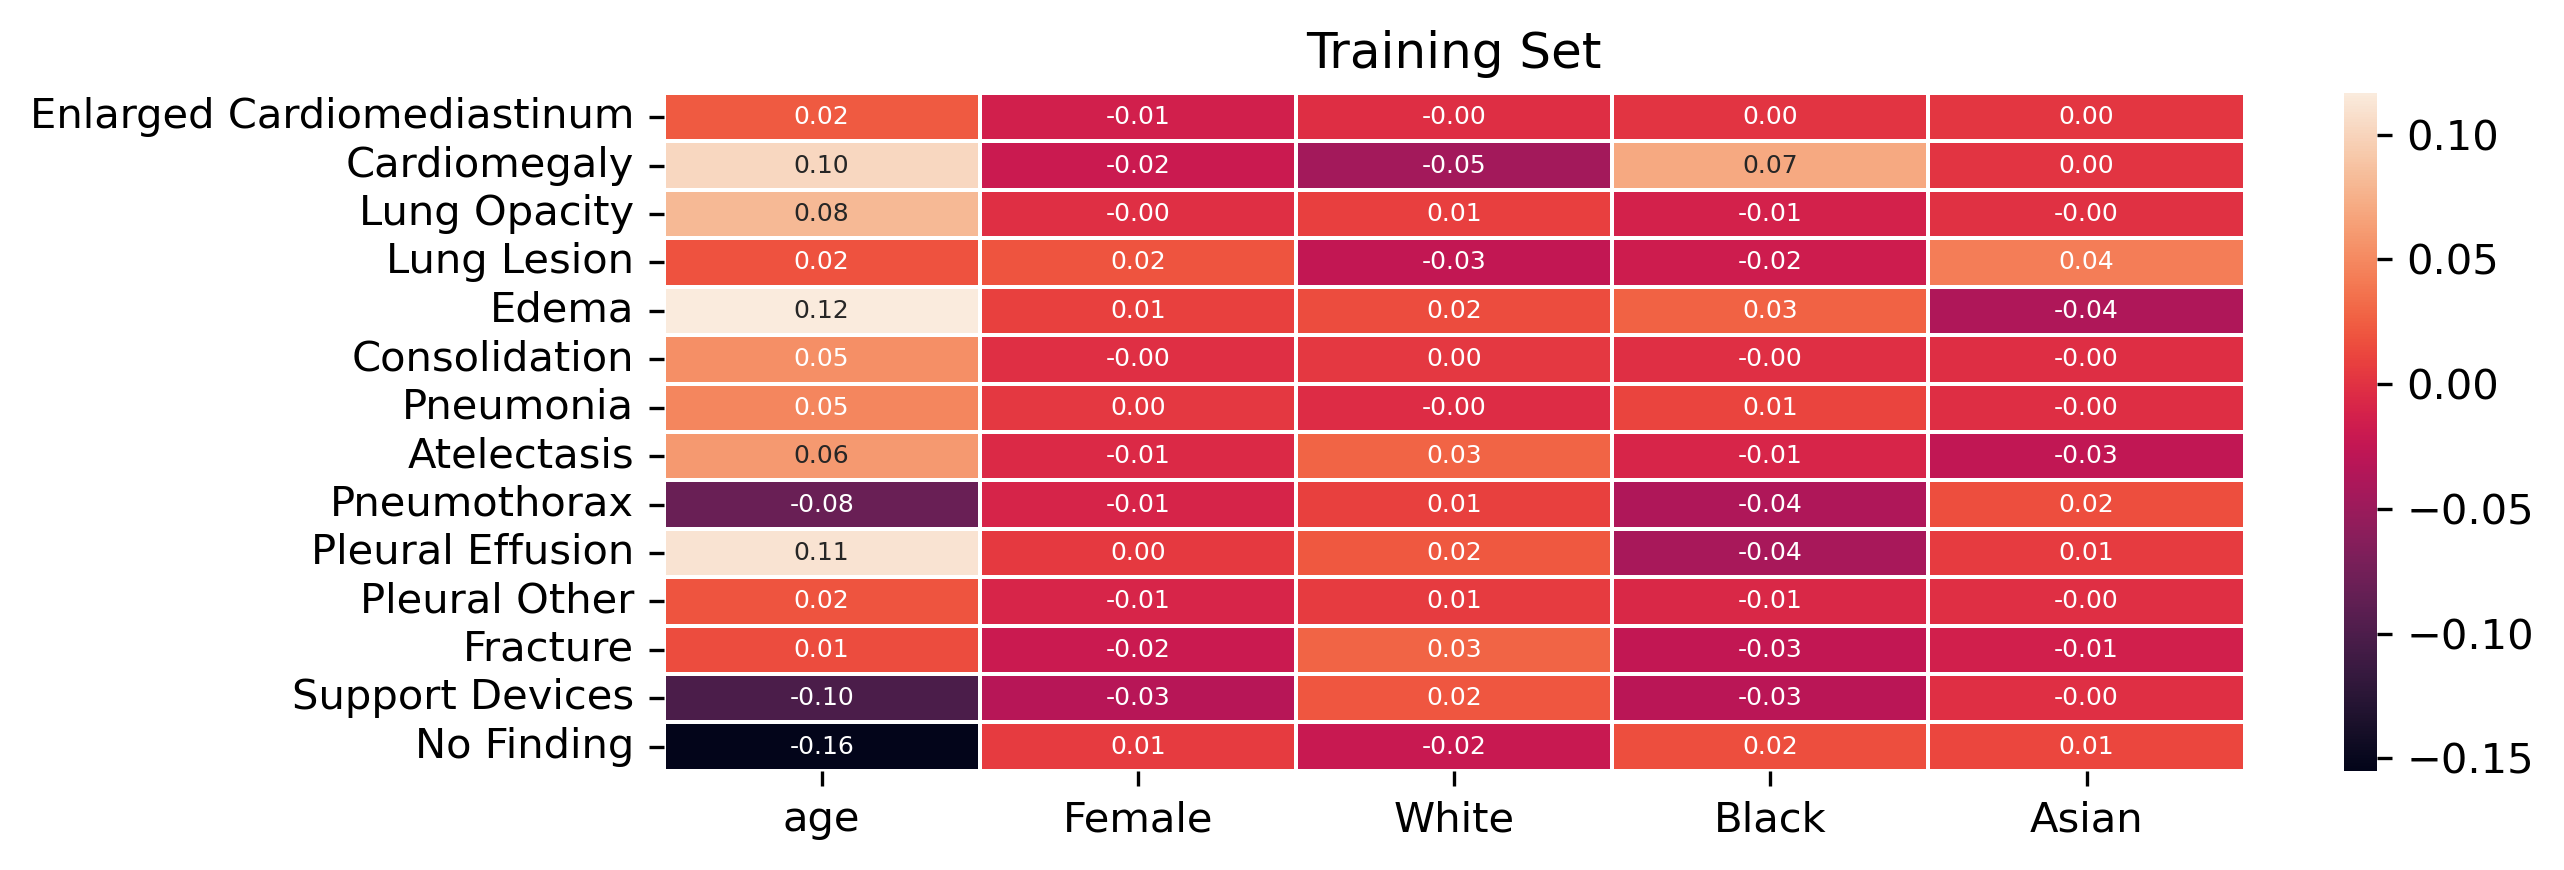

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3), sharey=True, sharex=True, dpi=300)
df_names = ['Training Set', 'Validation Set', 'Test Set']

for idx, df in enumerate([df_train]): #, df_val, df_test]):
   test = df.fillna(0) 
   test = test.replace(-1, 1) # Replace uncertain labels with positive labels

   sub_df = test[['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
         'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
         'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
         'Support Devices', 'No Finding', 'age', 'race', 'sex']]
   selected_df = pd.get_dummies(sub_df, columns=['race'], prefix='', prefix_sep='')
   selected_df = pd.get_dummies(selected_df, columns=['sex'], prefix='', prefix_sep='')

   correlation_matrix = selected_df.corr()
   correlation_matrix = correlation_matrix.loc[['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
                                            'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
                                            'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
                                            'Support Devices', 'No Finding']]
   correlation_matrix = correlation_matrix[['age', 'Female', 'White', 'Black', 'Asian']]

   # Set up the matplotlib figure
   # Create a heatmap of the correlation matrix
   sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 6}, linewidths=.5, ax=ax) 
   ax.set_title(df_names[idx])

plt.tight_layout()
plt.show()

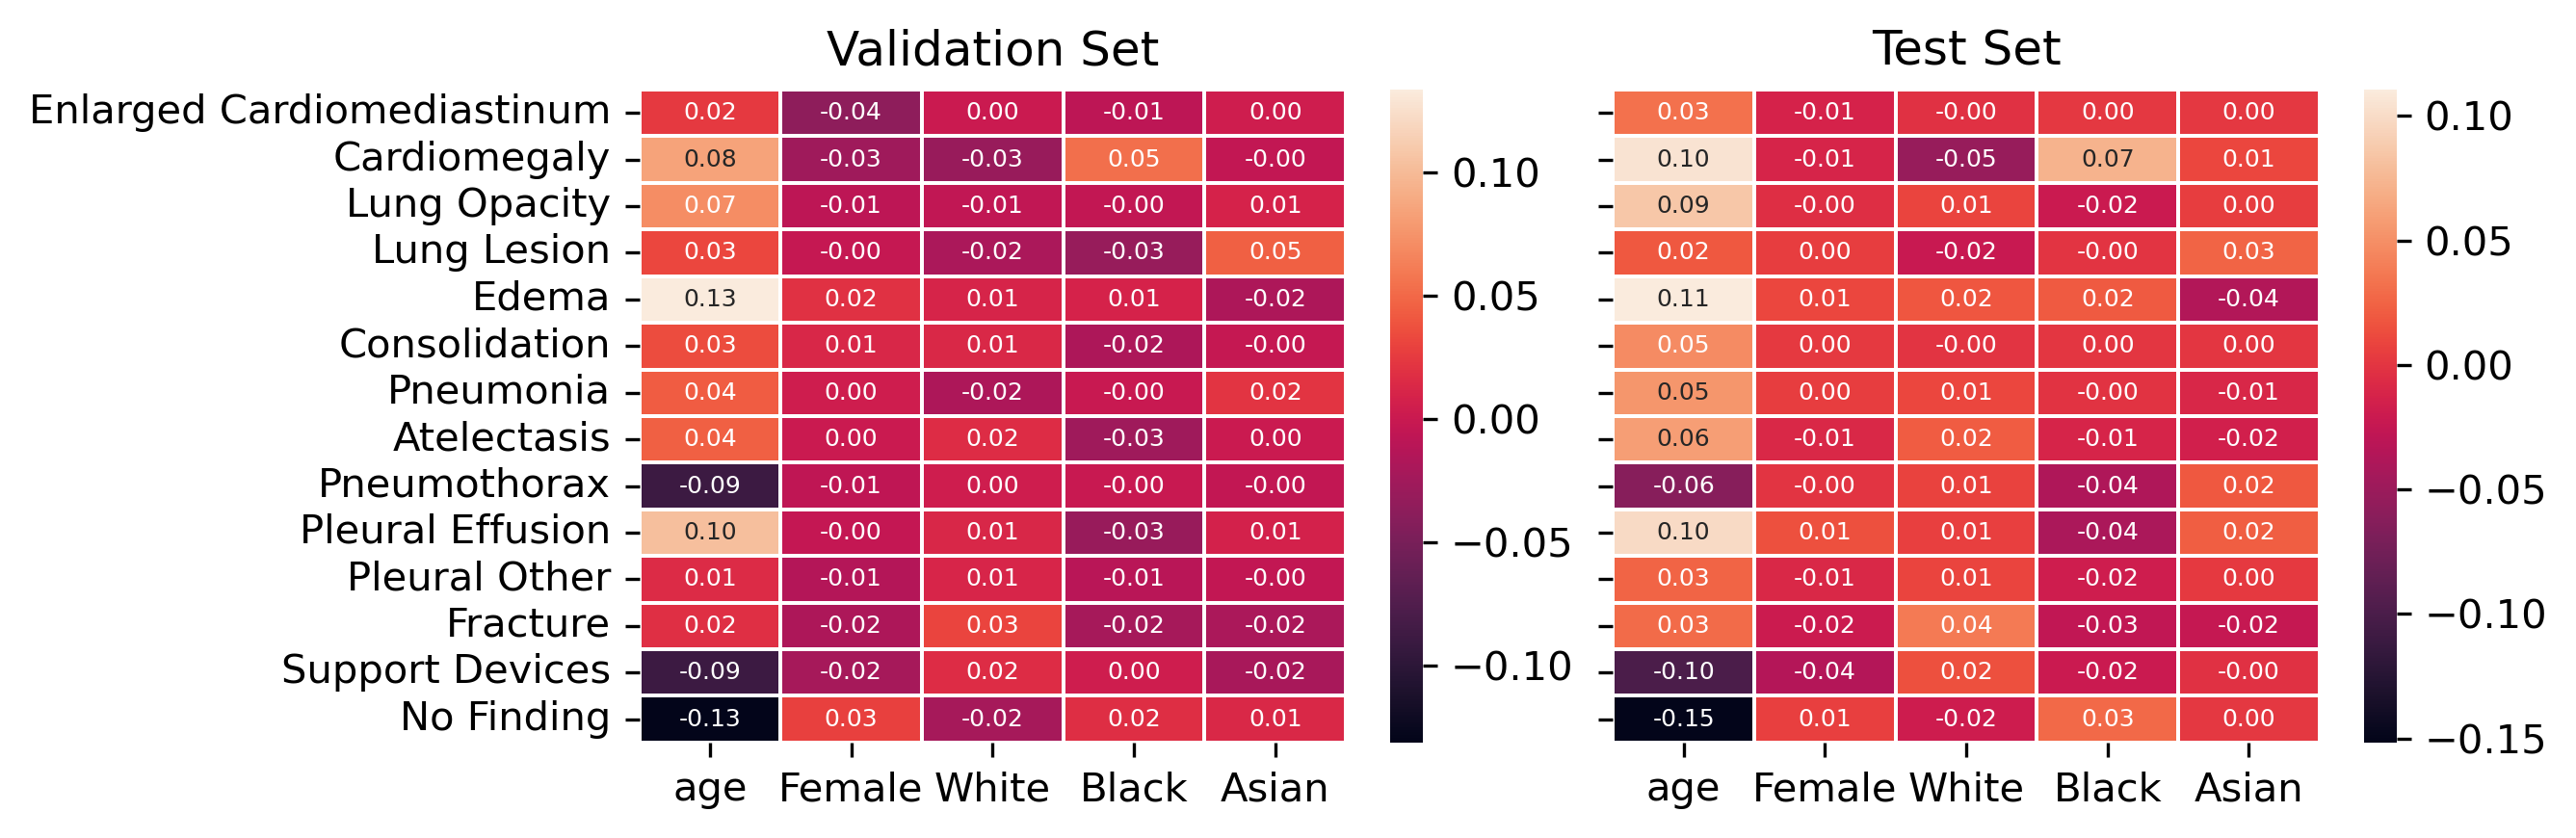

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3), sharey=True, sharex=True, dpi=300)
df_names = ['Validation Set', 'Test Set']

for idx, df in enumerate([df_val, df_test]):
   test = df.fillna(0) 
   test = test.replace(-1, 1) # Replace uncertain labels with positive labels

   sub_df = test[['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
         'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
         'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
         'Support Devices', 'No Finding', 'age', 'race', 'sex']]
   selected_df = pd.get_dummies(sub_df, columns=['race'], prefix='', prefix_sep='')
   selected_df = pd.get_dummies(selected_df, columns=['sex'], prefix='', prefix_sep='')

   correlation_matrix = selected_df.corr()
   correlation_matrix = correlation_matrix.loc[['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
                                            'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
                                            'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
                                            'Support Devices', 'No Finding']]
   correlation_matrix = correlation_matrix[['age', 'Female', 'White', 'Black', 'Asian']]

   # Set up the matplotlib figure
   # Create a heatmap of the correlation matrix
   sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 6}, linewidths=.5, ax=ax[idx]) 
   ax[idx].set_title(df_names[idx])

plt.tight_layout()
plt.show()